# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [41]:
# TODO: Load the three CSV files into dataframes
provider_df = pd.read_csv('data/provider_data.csv')
facility_df = pd.read_csv('data/facility_data.csv')
encounter_df = pd.read_csv('data/encounter_data.csv')

# TODO: Print the shapes of each dataframe
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", facility_df.shape)
print("Encounter data shape:", encounter_df.shape)

# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed

merged_df = pd.merge(encounter_df, provider_df, how='left', on='provider_id')
merged_df.rename(columns={"facility_id_x":"facility_id"}, inplace=True)
merged_df = pd.merge(merged_df, facility_df, how='left', on='facility_id')
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if col.endswith('_y')])
merged_df.columns = [col[:-2] if col.endswith('_x') else col for col in merged_df.columns]


# TODO: Print the merged dataframe shape, columns, and first few rows
print("\nMerged data shape:", merged_df.shape)
print("\nColumns:", merged_df.shape[1])
print("\nFirst few rows:", merged_df.head)

Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)

Merged data shape: (5000, 21)

Columns: 21

First few rows: <bound method NDFrame.head of      encounter_id patient_id provider_id facility_id encounter_date  \
0        ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1        ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2        ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3        ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4        ENC00005   PAT01388      PR0354      FAC003     2023-06-14   
...           ...        ...         ...         ...            ...   
4995     ENC04996   PAT01045      PR0065      FAC002     2023-05-27   
4996     ENC04997   PAT00658      PR0204      FAC004     2023-09-26   
4997     ENC04998   PAT01902      PR0174      FAC006     2023-04-25   
4998     ENC04999   PAT00925      PR0083      FAC006     2023-01-09   
4999     ENC05000   PAT00634      PR

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [42]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
group_by_fac = merged_df.groupby('facility_name')
# TODO: Calculate mean, sum, count for years_experience by facility
stats_by_fac = group_by_fac['years_experience'].agg(['mean', 'median', 'sum', 'count'])
stats_by_fac = stats_by_fac.round(1)
#print('Years Experience Stats by Facility\n', stats_by_fac)
# TODO: Calculate total encounter charges by facility
tot_encounter_charges = group_by_fac['service_charge'].agg('sum')
#print(tot_encounter_charges)
# TODO: Calculate total insurance payments by facility
ins_by_fac = group_by_fac['insurance_paid'].agg('sum')
# TODO: Find the facility with highest total encounter charges
highest_charge_fac = tot_encounter_charges.idxmax()
highest_charge_fac_amount = tot_encounter_charges.max()
# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid
summary_df = pd.DataFrame({
'facility_name': group_by_fac.size().index,
'total_providers': group_by_fac.size().values,
'avg_years_experience': group_by_fac['years_experience'].mean().values,
'total_service_charge': group_by_fac['service_charge'].sum().values,
'total_insurance_paid' : group_by_fac['insurance_paid'].sum().values
}).round(2)
summary_df
   

# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'
summary_df.to_csv('output/q1_groupby_analysis.csv', index=False)


### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [43]:
# TODO: Add facility mean years_experience as new column
merged_df['facility_avg_years_experience'] = merged_df.groupby(
    'facility_name')['years_experience'].transform('mean')
# TODO: Add facility standard deviation of years_experience
merged_df['facility_sd'] = merged_df.groupby(
    'facility_name')['years_experience'].transform('std')
# TODO: Create normalized years_experience (z-score within facility)
merged_df['fac_z_score'] = (
    (merged_df['years_experience'] - merged_df['facility_avg_years_experience'])
    /merged_df['facility_sd']
    )
# TODO: Add facility total encounter charges as new column
merged_df['tot_encounter_charges'] = merged_df.groupby('facility_name')['service_charge'].transform('sum')

# TODO: Display the enhanced dataframe
display(merged_df)
# TODO: Save results as 'output/q1_aggregation_report.txt'
with open('output/q1_aggregation_report.txt', 'w') as f:
    f.write("Assignment 8 - Question 1\n")
    merged_df.to_csv(f, sep='\t', index=False)
print('saved to output/q1_aggregation_report.txt')

,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,years_experience,license_number,facility_name,facility_type,beds,established_date,facility_avg_years_experience,facility_sd,fac_z_score,tot_encounter_charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30


saved to output/q1_aggregation_report.txt


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [44]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
merged_df_more_than_20_providers = (
    merged_df.groupby('facility_name').filter(
        lambda x: x['provider_name'].nunique()> 20
    )
)

display(merged_df_more_than_20_providers)

# TODO: Filter facilities with average years_experience > 10 (experienced staff)
merged_df_avg_yrs_over_10 = (
    merged_df.groupby('facility_name').filter(
        lambda x: x['years_experience'].mean()> 10
    )
)
display(merged_df_avg_yrs_over_10)

# TODO: Filter facilities with total encounter charges > 250000 (high volume)
merged_df_facilities_high_vol = (
    merged_df.groupby('facility_name').filter(
        lambda x: x['service_charge'].sum() > 250000
    )
)
display(len(merged_df_facilities_high_vol))

# TODO: Create a summary of filtered results
filtered_results_summary = pd.DataFrame({
'facility_name': group_by_fac.size().index,
'total_providers': group_by_fac.size().values,
'avg_years_experience': group_by_fac['years_experience'].mean().values,
'total_service_charge': group_by_fac['service_charge'].sum().values,
'total_insurance_paid' : group_by_fac['insurance_paid'].sum().values
}).round(2)
display(filtered_results_summary)

# TODO: Save results as 'output/q2_filter_analysis.csv'
filtered_results_summary.to_csv('output/q2_filter_analysis.csv')

,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,years_experience,license_number,facility_name,facility_type,beds,established_date,facility_avg_years_experience,facility_sd,fac_z_score,tot_encounter_charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30


,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,years_experience,license_number,facility_name,facility_type,beds,established_date,facility_avg_years_experience,facility_sd,fac_z_score,tot_encounter_charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30


5000

,facility_name,total_providers,avg_years_experience,total_service_charge,total_insurance_paid
0,Cardiology Specialty Center,441,19.32,276658.83,222139.04
1,City General Hospital,492,19.56,295508.13,236798.50
2,Community Health Clinic,510,20.16,334992.21,269207.92
3,Emergency Medical Center,495,19.67,310735.25,248439.20
4,Northside Urgent Care,489,20.14,297283.06,236839.71
5,Oncology Treatment Center,509,19.38,334927.30,267183.95
6,Pediatric Care Center,531,19.81,361811.04,291790.95
7,Primary Care Clinic,505,20.10,323315.71,260297.44
8,Regional Medical Center,478,20.21,316284.98,251750.43
9,Surgical Specialty Center,550,20.78,349909.18,278503.38


### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

 # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, years_experience, specialty

    1. use merged_df
    2. provider_count_df = group by provider_id, count(provider_id) as encounter_count, pull following columns no aggregation -> provider_id, provider_name, years_experience, speciality
    3. order by encounter count so that when you do n=2 it will pull top 2 providers

In [45]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    df = group['years_experience']
    return pd.Series({
        'mean':df.mean().round(2), 
        'sd':df.std().round(2),
        'min':df.min().round(2),
        'max':df.max().round(2),
        'range':(df.max()-df.min()).round(2)
    })
# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)
display(facility_provider_stats)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    top_provider_ids = group['provider_id'].value_counts().head(n).index
    return group[group['provider_id'].isin(top_provider_ids)][
        ['provider_id', 'provider_name', 'years_experience', 'specialty']
    ].drop_duplicates()

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column
display(top_providers_by_facility)
# TODO: Save results as 'output/q2_performance_report.txt'
with open('output/q2_performance_report.txt', 'w') as f:
    f.write("Assignment 8 - Question 2\n")
    top_providers_by_facility.to_csv(f, index=False)
print('saved to output as q2_performance_report.txt')

,mean,sd,min,max,range
facility_name,,,,,
Cardiology Specialty Center,19.32,10.48,1.0,39.0,38.0
City General Hospital,19.56,10.70,1.0,39.0,38.0
Community Health Clinic,20.16,11.04,1.0,39.0,38.0
Emergency Medical Center,19.67,11.02,1.0,39.0,38.0
Northside Urgent Care,20.14,10.58,1.0,39.0,38.0
Oncology Treatment Center,19.38,10.87,1.0,39.0,38.0
Pediatric Care Center,19.81,11.00,1.0,39.0,38.0
Primary Care Clinic,20.10,11.08,1.0,39.0,38.0
Regional Medical Center,20.21,11.58,1.0,39.0,38.0


/var/folders/6h/ch1ltdnj3v33nkw2k13k_h8w0000gn/T/ipykernel_33075/112337220.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


,facility_name,provider_id,provider_name,years_experience,specialty
486,Cardiology Specialty Center,PR0337,Riley Martinez,14,Endocrinology
837,Cardiology Specialty Center,PR0093,Avery Smith,16,Pediatrics
752,City General Hospital,PR0173,Riley Davis,21,Dermatology
2342,City General Hospital,PR0079,Taylor Davis,25,Psychiatry
220,Community Health Clinic,PR0106,Avery Jones,7,Neurology
383,Community Health Clinic,PR0236,Drew Jones,34,Endocrinology
76,Emergency Medical Center,PR0367,Sam Jones,28,Oncology
832,Emergency Medical Center,PR0216,Taylor Anderson,33,Orthopedics
165,Northside Urgent Care,PR0416,Avery Smith,24,Pediatrics
397,Northside Urgent Care,PR0143,Taylor Rodriguez,17,Oncology


saved to output as q2_performance_report.txt


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [46]:
# TODO: Group by facility type and region
group_fac_reg = merged_df.groupby(
    ['facility_type', 'region']).agg({
        'provider_id': 'nunique',
        'beds' : 'mean',
        'years_experience': 'mean',
        'service_charge': 'mean',
        'insurance_paid': 'mean'
    })
group_fac_reg = group_fac_reg.rename(columns = {
    'provider_id' : 'total_providers',
    'beds' : 'avg_beds',
    'years_experience' : 'avg_years_experience',
    'service_charge' : 'avg_service_charge',
    'insurance_paid' : 'avg_insurance_paid'  
})
# TODO: Calculate statistics for each facility_type-region combination
display(group_fac_reg)
# TODO: Use unstack to convert to wide format
group_fac_reg_wide = group_fac_reg.unstack()
display(group_fac_reg_wide)
# TODO: Use stack to convert back to long format
group_fac_reg_long = group_fac_reg_wide.stack()
display(group_fac_reg_long)

# TODO: Analyze the hierarchical structure
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
group_fac_reg.to_csv('output/q2_hierarchical_analysis.csv')

total_providers    avg_beds  avg_years_experience  \
facility_type    region                                                      
Hospital         South               324  252.000000             19.381139   
Specialty Center South               424  287.587719             19.742690   
                 West                427   35.413319             19.737844   
Urgent Care      North               328  160.000000             20.160784   
                 South               430  366.179381             19.881443   
                 West                444  398.226179             20.476420   

                         avg_service_charge  avg_insurance_paid  
facility_type    region                                          
Hospital         South           658.010413          524.919352  
Specialty Center South           655.503207          526.540107  
                 West            634.222558          509.975137  
Urgent Care      North           656.847471          527.858667  
                 South           630.714546          503.658691  
                 West            622.899172          495.999124

total_providers               avg_beds              \
region                     North  South   West    North       South   
facility_type                                                         
Hospital                     NaN  324.0    NaN      NaN  252.000000   
Specialty Center             NaN  424.0  427.0      NaN  287.587719   
Urgent Care                328.0  430.0  444.0    160.0  366.179381   

                             avg_years_experience                        \
region                  West                North      South       West   
facility_type                                                             
Hospital                 NaN                  NaN  19.381139        NaN   
Specialty Center   35.413319                  NaN  19.742690  19.737844   
Urgent Care       398.226179            20.160784  19.881443  20.476420   

                 avg_service_charge                          \
region                        North       South        West   
facility_type                                                 
Hospital                        NaN  658.010413         NaN   
Specialty Center                NaN  655.503207  634.222558   
Urgent Care              656.847471  630.714546  622.899172   

                 avg_insurance_paid                          
region                        North       South        West  
facility_type                                                
Hospital                        NaN  524.919352         NaN  
Specialty Center                NaN  526.540107  509.975137  
Urgent Care              527.858667  503.658691  495.999124

/var/folders/6h/ch1ltdnj3v33nkw2k13k_h8w0000gn/T/ipykernel_33075/1554994668.py:23: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  group_fac_reg_long = group_fac_reg_wide.stack()


total_providers    avg_beds  avg_years_experience  \
facility_type    region                                                      
Hospital         South             324.0  252.000000             19.381139   
Specialty Center South             424.0  287.587719             19.742690   
                 West              427.0   35.413319             19.737844   
Urgent Care      North             328.0  160.000000             20.160784   
                 South             430.0  366.179381             19.881443   
                 West              444.0  398.226179             20.476420   

                         avg_service_charge  avg_insurance_paid  
facility_type    region                                          
Hospital         South           658.010413          524.919352  
Specialty Center South           655.503207          526.540107  
                 West            634.222558          509.975137  
Urgent Care      North           656.847471          527.858667  
                 South           630.714546          503.658691  
                 West            622.899172          495.999124

## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [50]:
# TODO: Create pivot table: encounter charges by procedure code and region
pivot_encounter_region_sum = pd.pivot_table(
    merged_df,
    values='service_charge',
    index='procedure_code',
    columns='region',
    aggfunc='sum'
)
display(pivot_encounter_region_sum)
# TODO: Create pivot table with multiple aggregations (sum, mean, count)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value
pivot_multiple_agg = pd.pivot_table(
    merged_df,
    values='service_charge',
    index='procedure_code',
    columns='region',
    aggfunc='sum',
    margins=True,
    margins_name='totals',
    fill_value=0
)
display(pivot_multiple_agg)

# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
pivot_multiple_agg.to_csv('output/q3_pivot_analysis.csv')
print('saved to output/q3_pivot_analysis.csv')

region,North,South,West
procedure_code,,,
36415,12130.35,57836.97,48458.05
70450,90236.85,375893.20,312204.53
70551,52844.83,234817.26,160891.32
72040,11463.33,81039.58,56599.39
80053,14798.09,83849.78,58540.39
85025,8946.57,48989.64,40769.13
93000,6743.28,55873.35,45845.38
99213,62143.42,327262.66,259242.79
99214,71684.08,322532.05,240095.41


region,North,South,West,totals
procedure_code,,,,
36415,12130.35,57836.97,48458.05,118425.37
70450,90236.85,375893.20,312204.53,778334.58
70551,52844.83,234817.26,160891.32,448553.41
72040,11463.33,81039.58,56599.39,149102.30
80053,14798.09,83849.78,58540.39,157188.26
85025,8946.57,48989.64,40769.13,98705.34
93000,6743.28,55873.35,45845.38,108462.01
99213,62143.42,327262.66,259242.79,648648.87
99214,71684.08,322532.05,240095.41,634311.54


saved to output/q3_pivot_analysis.csv


### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [48]:
# TODO: Create crosstab of facility type vs region with counts
crosstab_fac_reg = pd.crosstab(
    merged_df['facility_type'],
    merged_df['region']
)
display(crosstab_fac_reg)
# TODO: Create crosstab with margins (row and column totals)
crosstab_with_margins = pd.crosstab(
    merged_df['facility_type'],
    merged_df['region'],
    margins=True,
    margins_name='totals'
)
display(crosstab_with_margins)


# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
crosstab_multi_dimensions = pd.crosstab(
    index=[merged_df['region'], merged_df['encounter_type']],
    columns=merged_df['facility_type'],
    margins=True,
    margins_name='totals'
)
display(crosstab_multi_dimensions)

# TODO: Analyze the cross-tabulation results
# TODO: Save results as 'output/q3_crosstab_analysis.csv'
crosstab_multi_dimensions.to_csv('output/q3_crosstab_analysis.csv')
print('saved crosstab to output/q3_crosstab_analysis.csv')

region,North,South,West
facility_type,,,
Hospital,0,509,0
Specialty Center,0,1026,946
Urgent Care,510,970,1039


region,North,South,West,totals
facility_type,,,,
Hospital,0,509,0,509
Specialty Center,0,1026,946,1972
Urgent Care,510,970,1039,2519
totals,510,2505,1985,5000


facility_type                Hospital  Specialty Center  Urgent Care  totals
region encounter_type                                                       
North  Emergency                    0                 0          109     109
       Inpatient                    0                 0           90      90
       Lab                          0                 0           90      90
       Office Visit                 0                 0          112     112
       Outpatient Procedure         0                 0          109     109
South  Emergency                  127               236          190     553
       Inpatient                   95               210          190     495
       Lab                        100               211          229     540
       Office Visit                85               175          178     438
       Outpatient Procedure       102               194          183     479
West   Emergency                    0               182          195     377
       Inpatient                    0               191          201     392
       Lab                          0               180          228     408
       Office Visit                 0               200          200     400
       Outpatient Procedure         0               193          215     408
totals                            509              1972         2519    5000

saved crosstab to output/q3_crosstab_analysis.csv


### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

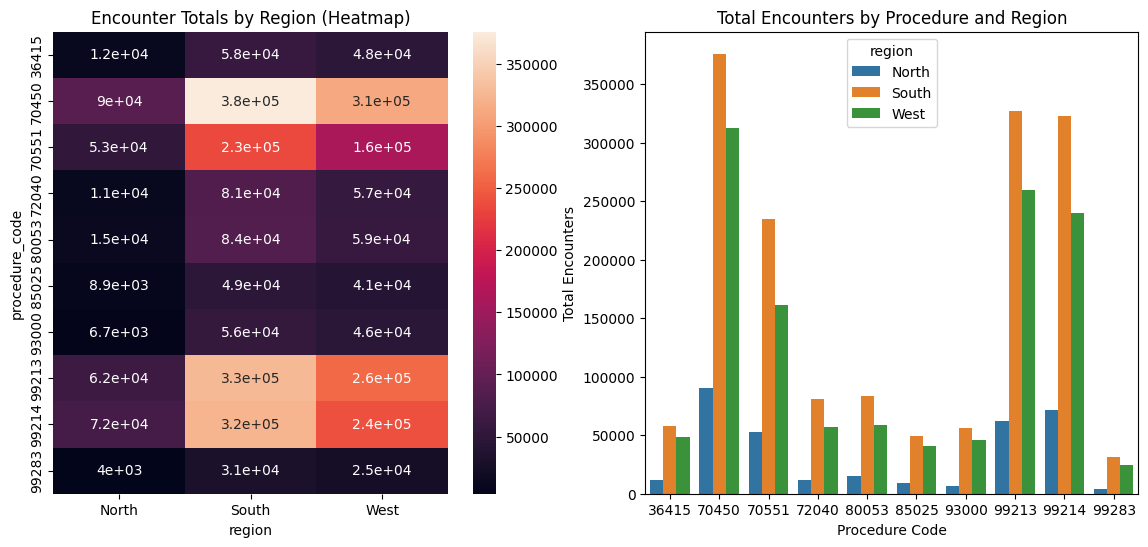

In [49]:
# TODO: Create heatmap from pivot table
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Create heatmap from pivot table 
sns.heatmap(
    pivot_encounter_region_sum,
    annot=True,
    ax=axes[0]
)
axes[0].set_title("Encounter Totals by Region (Heatmap)")
# TODO: Create bar chart from pivot table
pivot_long = pivot_encounter_region_sum.reset_index().melt(
    id_vars='procedure_code',
    var_name='region',
    value_name='service_charge'
)

sns.barplot(
    data=pivot_long,
    x='procedure_code',
    y='service_charge',
    hue='region',
    ax=axes[1]
)
axes[1].set_title("Total Encounters by Procedure and Region")
axes[1].set_xlabel("Procedure Code")
axes[1].set_ylabel("Total Encounters")
plt.show()
# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels

# TODO: Save the plot as 'output/q3_pivot_visualization.png'
plt.tight_layout()
plt.savefig("output/q3_pivot_visualization.png")
plt.close()


## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques